In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [47]:
df = pd.read_excel('US_Superstore _data.xls')

In [48]:
print(df.head(2))
print(df.info())
print("Number of duplicate rows:", df.duplicated().sum())
print("Missing values:\n", df.isna().sum())

   Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   

  Customer Name   Segment        Country       City  ... Postal Code  Region  \
0   Claire Gute  Consumer  United States  Henderson  ...       42420   South   
1   Claire Gute  Consumer  United States  Henderson  ...       42420   South   

        Product ID   Category Sub-Category  \
0  FUR-BO-10001798  Furniture    Bookcases   
1  FUR-CH-10000454  Furniture       Chairs   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  

[2 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9

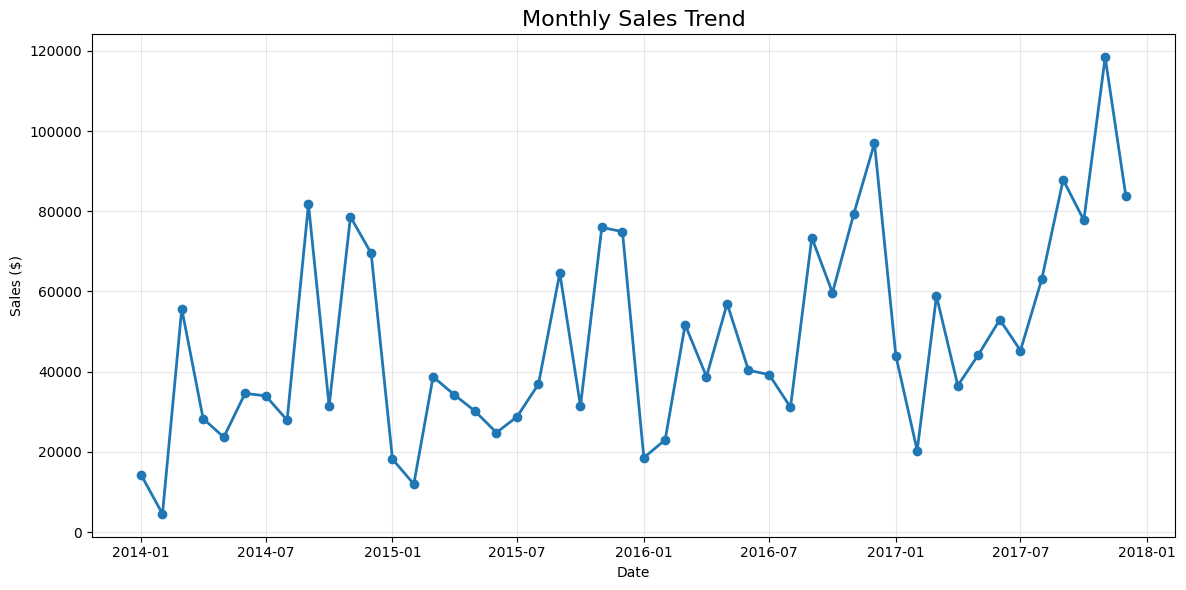

In [49]:
# --- 2) Data Visualization with Matplotlib ----------------------------------

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract Year and Month as new columns
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

# (a) Line chart: Monthly Sales Trend
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# combine Year and Month into a single date
monthly_sales['Date'] = pd.to_datetime(
    monthly_sales['Order Year'].astype(str) + '-' + monthly_sales['Order Month'].astype(str) + '-01'
)

# Function for interactive plot
def plot_sales_trend():
    plt.figure(figsize=(12,6))
    plt.plot(monthly_sales['Date'], monthly_sales['Sales'], marker='o', linewidth=2)
    plt.title("Monthly Sales Trend", fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Sales ($)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_sales_trend()


In [50]:
# (b) Map-like visualization (bar chart by country)


country_sales = df.groupby('Country')['Sales'].sum().reset_index()

fig = px.choropleth(
    country_sales,
    locations='Country',                 # uses country names
    locationmode='country names',        # tell plotly these are names
    color='Sales',
    hover_name='Country',
    color_continuous_scale='Viridis',
    title='Sales Distribution by Country',
    projection='natural earth'
)
fig.update_geos(showframe=False, showcoastlines=True)
fig.update_layout(coloraxis_colorbar_title='Sales')
fig.show()


/tmp/ipython-input-196344503.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




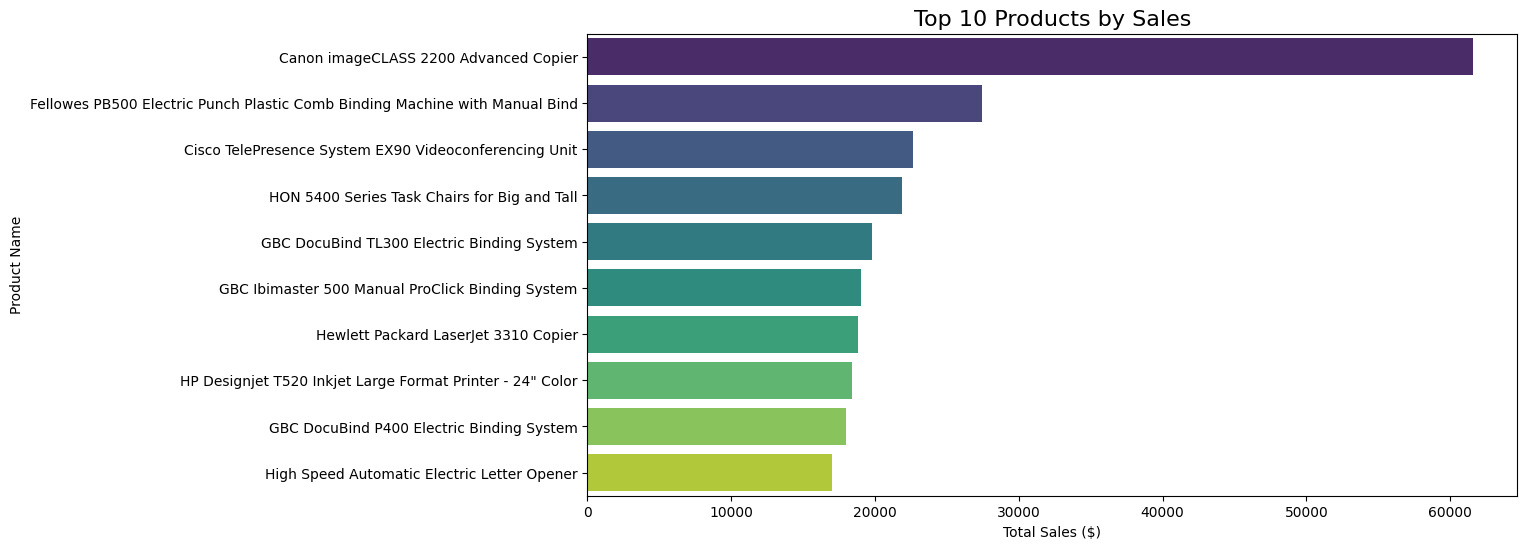

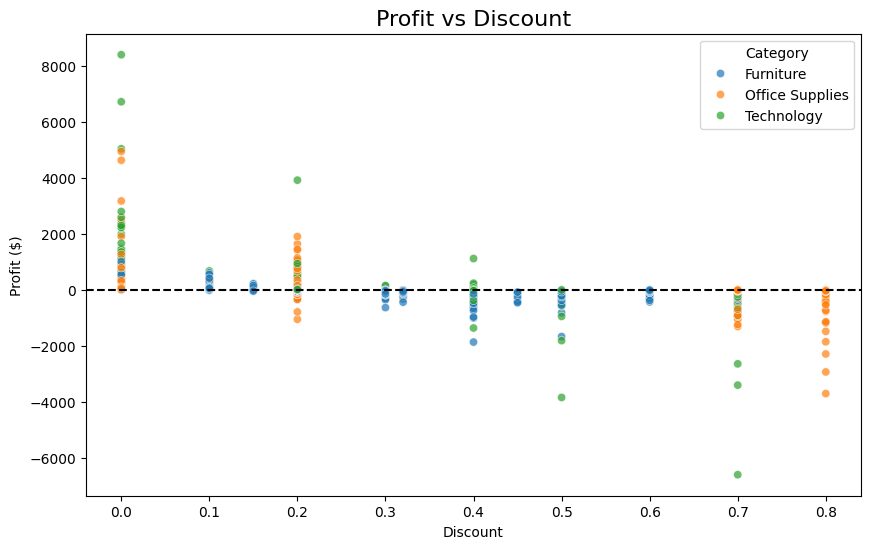

In [51]:
# --- 3) Data Visualization with Seaborn ------------------------------------

# (a) Top 10 products by sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales", fontsize=16)
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.show()


# (b) Profit vs Discount scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', alpha=0.7)
plt.title("Profit vs Discount", fontsize=16)
plt.xlabel("Discount")
plt.ylabel("Profit ($)")
plt.axhline(y=0, color="black", linestyle="--")  # break-even line
plt.show()


In [52]:
# --- 4) Comparative Analysis -----------------------------------------------
print("Matplotlib: Like manual mode – you control every detail, but it takes more work.")
print("Seaborn: Like auto mode – quick, nice-looking charts with less code.")

Matplotlib: Like manual mode – you control every detail, but it takes more work.
Seaborn: Like auto mode – quick, nice-looking charts with less code.
